<a href="https://colab.research.google.com/github/sergiodegioia/deeplearning/blob/master/com/sergiodegioia/deeplearning/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

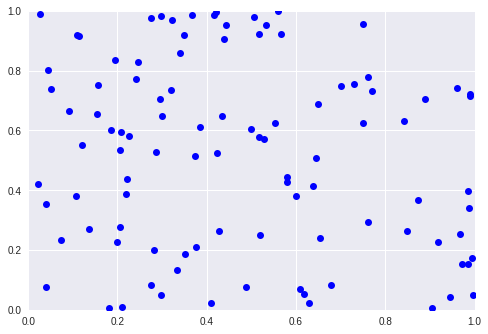

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 20 11:50:53 2019

@author: sdeg
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import matplotlib.animation as animation
import matplotlib.lines as ln
import time

class KMeans:
    def __init__( self):
        self.iteration = 0
        self.assign_phase = True
        #assing phase, that is "clustering"
        self.observations = np.random.rand( 100, 2)
        self.centroids = np.random.rand( 4, 2)
        self.centroids = np.array( [[.1, .1], [.1, .9], [.9, .1], [.9, .9]])
        fig, ax = plt.subplots()
        #l, = plt.plot( [], [], 'r-')
        plt.xlim( 0, 1)
        plt.ylim( 0, 1)
        #[ plt.plot( *obs, marker='x') for obs in self.centroids]
        [ plt.plot( *obs, 'bo') for obs in self.observations]
        la = animation.FuncAnimation( fig, self.update_line, 10, fargs=(ax,), init_func = self.initfunc, interval = 2000, blit=True)
        plt.show()
    
    def initfunc( self):
        return []

    def update_line( self, num, axes):
        print( "assign_phase {}".format( self.assign_phase))
        #print("update_line {}".format( num))
        data = self.next_data()
        lns = []
        for i in range( len( data)):
            end_set_pair = np.array( data[ i])
            line_set = np.zeros( end_set_pair.shape[1::-1] + (2,))
            line_set[ :, :, 0] = end_set_pair[ :, :, 0].T
            line_set[ :, :, 1] = end_set_pair[ :, :, 1].T
            labels = np.random.randint(0,3, size = len( data[ i]))
            coll = collections.LineCollection( line_set)
            axes.add_collection( coll)
            lns.append( coll)
        return lns

    def next_data( self):
        if self.assign_phase == True:
            #print("assign")
            self.assign_phase = False
            return self.assign()
        else:
            #print("minimize")
            self.assign_phase = True
            return self.minimize()
    
    def assign( self):
        self.clusters = [ [] for i in range( len( self.centroids))]
        for next in self.observations:
            self.clusters[ nearest_point( next, self.centroids)].append( next)
        return [ [ [self.centroids[ i]]*len(self.clusters[ i]), self.clusters[ i]] for i in range( len( self.centroids)) if len( self.clusters[ i]) != 0]


    def minimize( self):
        #minimize phase, that is "centroids relaxation"
        i = 0
        for next in self.centroids:
            if len( self.clusters[ i]) != 0:
                self.centroids[ i] = barycenter( self.clusters[ i])
            i += 1
        return [ [ [self.centroids[ i]]*len(self.clusters[ i]), self.clusters[ i]] for i in range( len( self.centroids)) if len( self.clusters[ i]) != 0]
    

def main():
    KMeans()

def barycenter( points):
    if len( points) == 0:
        return points
    return sum( points)/len( points)

def star( center, points):
    """family of intersecting straight lines from 'center' to all points in 'points' on the real plane.
    Points are represented as arrays of 2D coordinates.
    
    Keyword arguments:
        
    ax -- matplotlib.pyplot.axis on which lines are plotter.
    center -- point of intersection of the straight lines.
    points -- must be a non-empty array of points. They are the endpoints of the straight lines.
    """
    n = len( points)
    if n == 0:
        return [[], []]
    return [[[center[ 0]]*n, np.array( points)[ :, 0]], [[center[ 1]]*n, np.array( points)[ :, 1]]]

def nearest_point( ref, points):
    """get the position in 'points' of the point nearest to 'ref', in terms of Euclidean distance.
    Points are represented as arrays of coordinates.
    
    Keyword arguments:
        
    ref -- must be a point.
    points -- must be a non-empty array of points.
    """
    min_dist = np.infty
    i = 0
    for point in points:
        dist = np.sqrt( sum( (point - ref) ** 2))
        if dist < min_dist:
            min_dist = dist
            ret = i
        i = i + 1
    return ret

if __name__ == "__main__":
    main()
